In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1. EDA

1. loading data


In [2]:
data = pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
data.shape

(1000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


object data need to be encoded 

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
for col in data.select_dtypes('object'):
    print(col," : ",data[col].unique())

Sex  :  ['male' 'female']
Housing  :  ['own' 'free' 'rent']
Saving accounts  :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account  :  ['little' 'moderate' nan 'rich']
Purpose  :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


2. checking for nulls

In [8]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [9]:
data['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [10]:
data.groupby('Job')['Saving accounts'].value_counts()

Job  Saving accounts
0    little              13
     quite rich           3
     rich                 1
1    little             128
     moderate            23
     quite rich          12
     rich                 8
2    little             366
     moderate            66
     quite rich          42
     rich                36
3    little              96
     moderate            14
     quite rich           6
     rich                 3
Name: count, dtype: int64

In [11]:
job_saving_map = (data.groupby('Job')['Saving accounts'].agg(lambda x: x.mode()[0])).to_dict()
job_saving_map

{0: 'little', 1: 'little', 2: 'little', 3: 'little'}

In [12]:
data['Saving accounts'] = data['Saving accounts'].fillna(data['Job'].map(job_saving_map))
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [13]:
job_checking_map = (data.groupby('Job')['Checking account'].agg(lambda x: x.mode()[0])).to_dict()
job_checking_map

{0: 'moderate', 1: 'little', 2: 'little', 3: 'moderate'}

In [14]:
data['Checking account'] = data['Checking account'].fillna(data['Job'].map(job_checking_map))
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [15]:
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

<Axes: >

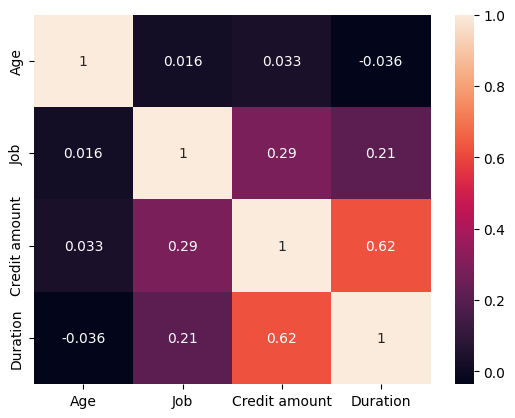

In [16]:
sns.heatmap(data.select_dtypes('number').corr(),annot=True)

plotting age vs rest

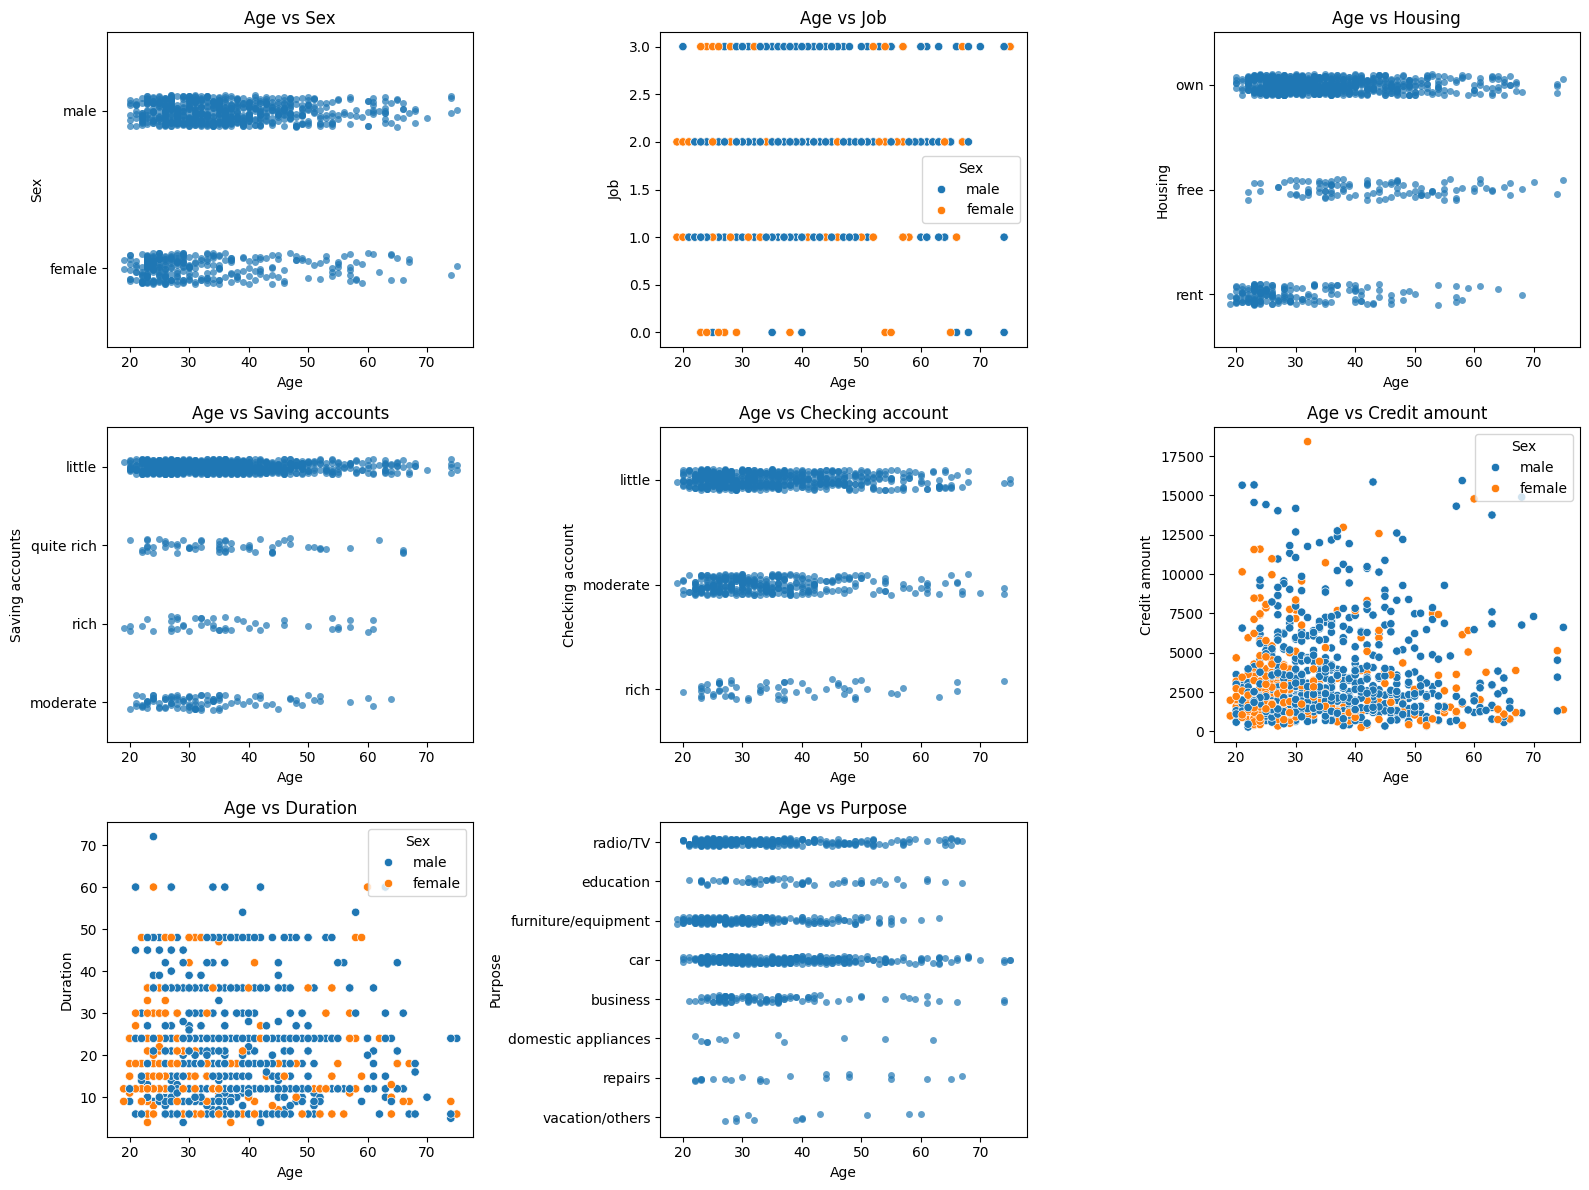

In [17]:
features = [col for col in data.columns if col != 'Age']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    if data[col].dtype in ['int64', 'float64']:
        sns.scatterplot(data=data, x='Age', y=col, ax=axes[i],hue='Sex')
    else:
        sns.stripplot(data=data, x='Age', y=col, ax=axes[i], jitter=True, alpha=0.7)
    
    axes[i].set_title(f'Age vs {col}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

almost no realtions

duration vs rest 

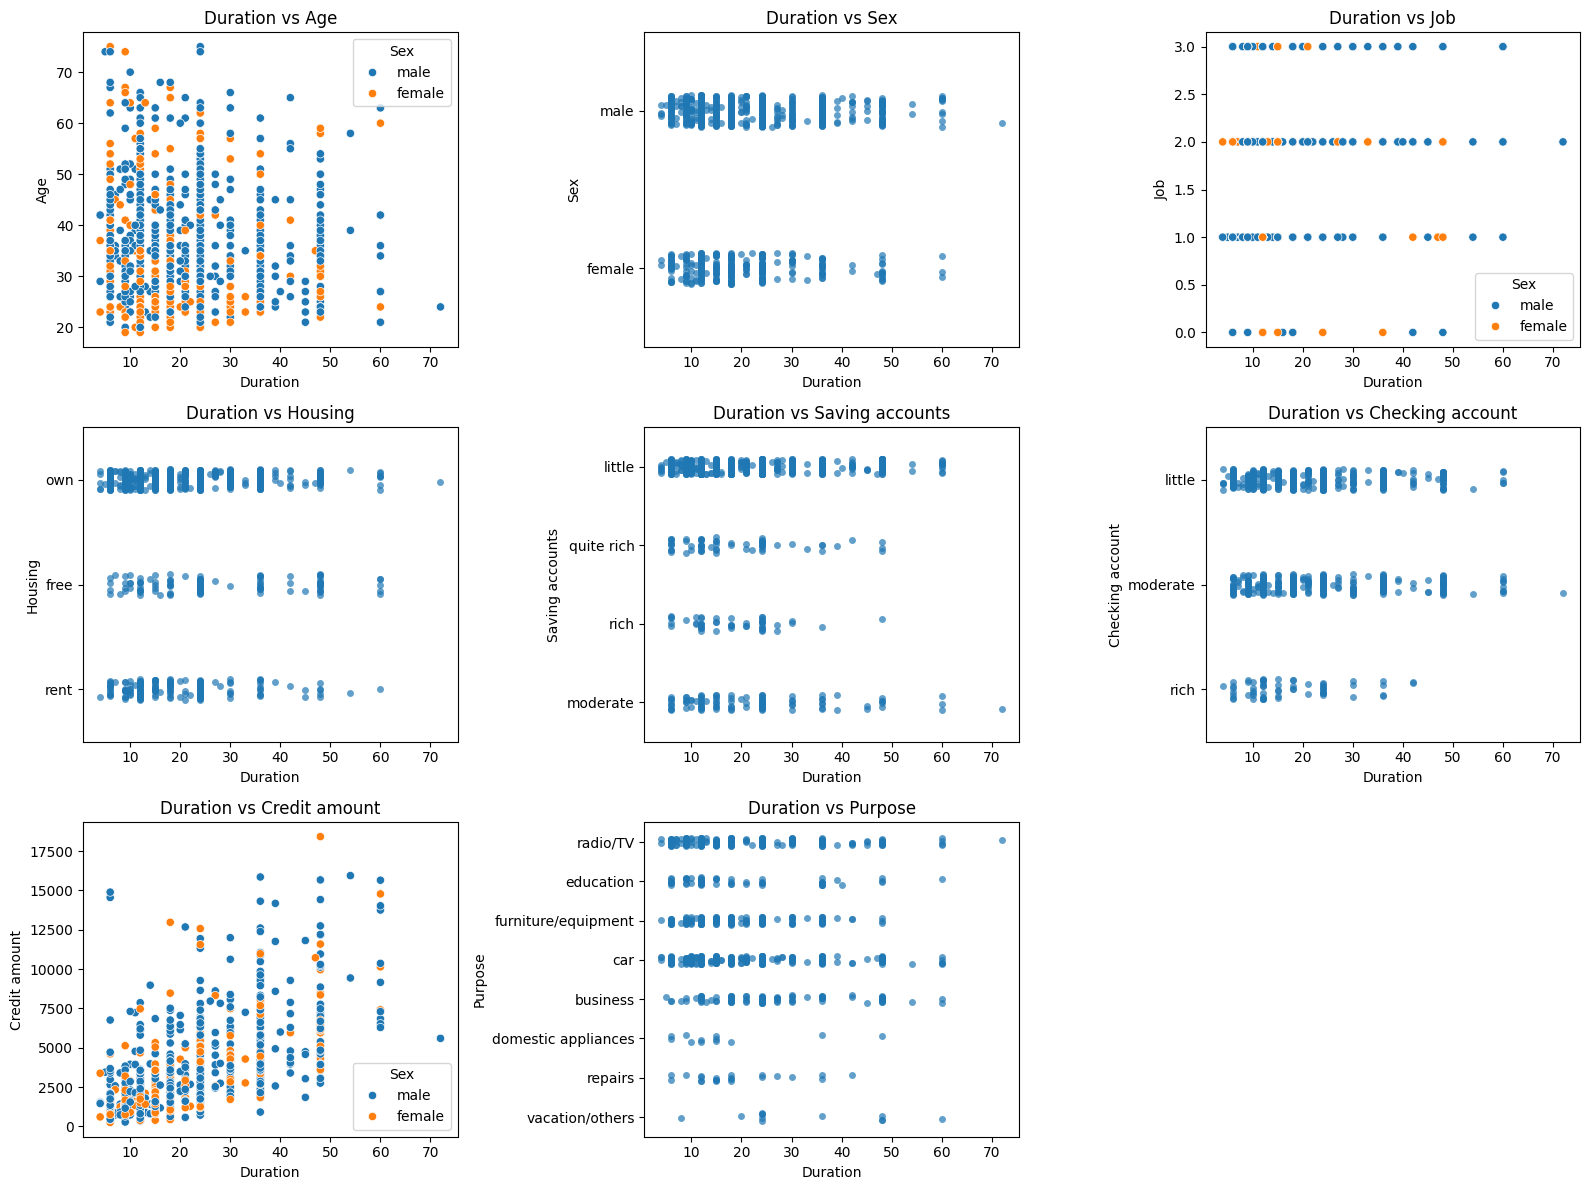

In [18]:
features = [col for col in data.columns if col != 'Duration']


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features):

    if data[col].dtype in ['int64', 'float64']:
        sns.scatterplot(data=data, x='Duration', y=col, ax=axes[i],hue='Sex')

    else:
        sns.stripplot(data=data, x='Duration', y=col, ax=axes[i], jitter=True, alpha=0.7)
    
    axes[i].set_title(f'Duration vs {col}', fontsize=12)
    axes[i].set_xlabel('Duration')
    axes[i].set_ylabel(col)



for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

no relations

In [20]:
credit_amoount_vs_purpose = data.groupby('Purpose')['Credit amount'].count().sort_values(ascending=False)
credit_amoount_vs_purpose

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Credit amount, dtype: int64

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_25240\585188501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


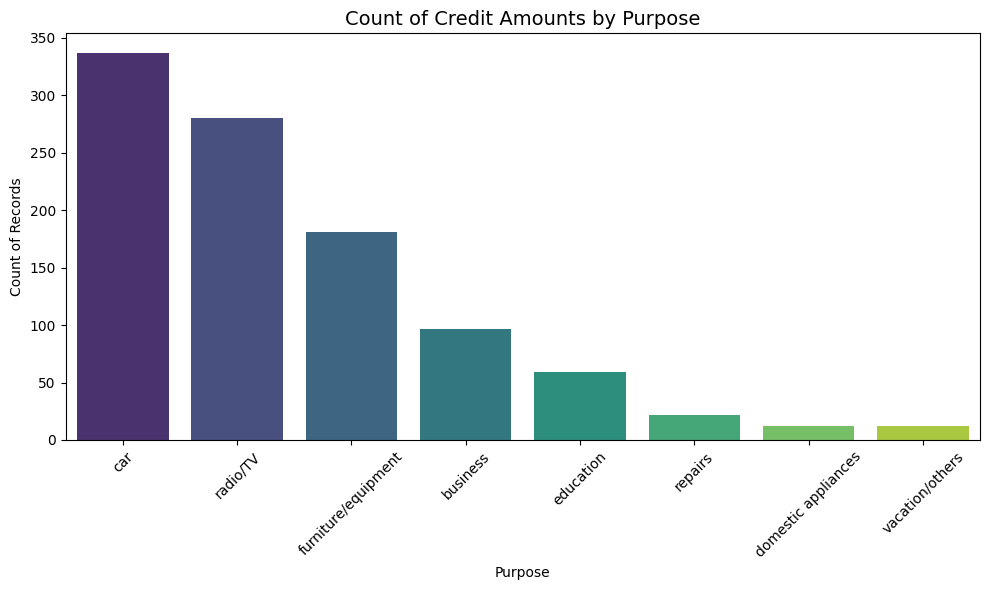

In [21]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=credit_amoount_vs_purpose.index,
    y=credit_amoount_vs_purpose.values,
    palette='viridis'
)

plt.title('Count of Credit Amounts by Purpose', fontsize=14)
plt.xlabel('Purpose')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- cars consumes most amount of credit records
- least is vacation

In [22]:
credit_amoount_vs_purpose = data.groupby('Purpose')['Credit amount'].sum().sort_values(ascending=False)
credit_amoount_vs_purpose

Purpose
car                    1269881
radio/TV                696543
furniture/equipment     555125
business                403330
education               169873
vacation/others          98512
repairs                  60018
domestic appliances      17976
Name: Credit amount, dtype: int64

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_25240\2208971380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


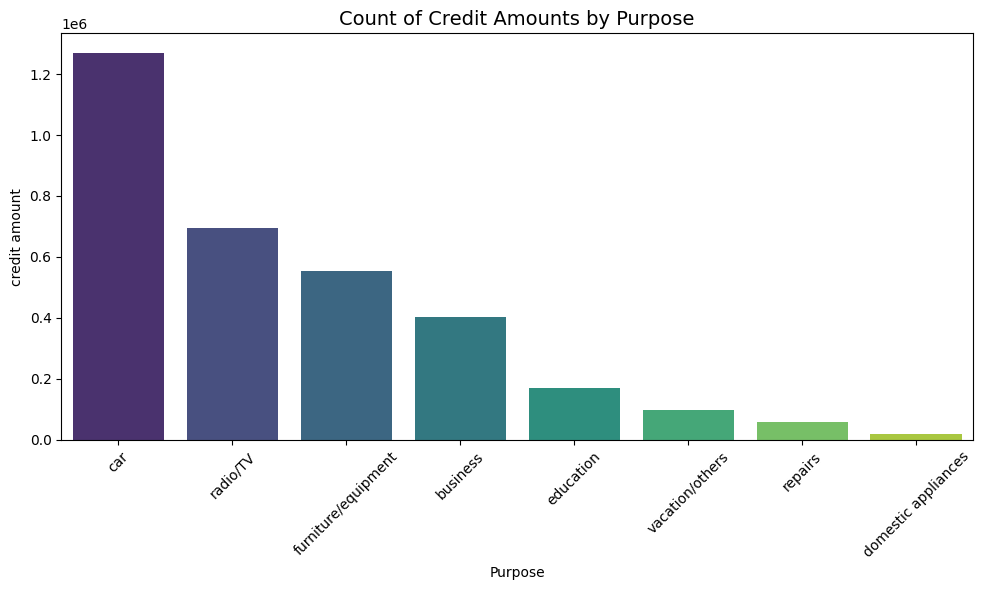

In [23]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=credit_amoount_vs_purpose.index,
    y=credit_amoount_vs_purpose.values,
    palette='viridis'
)

plt.title('Count of Credit Amounts by Purpose', fontsize=14)
plt.xlabel('Purpose')
plt.ylabel('credit amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

vacations requires more money

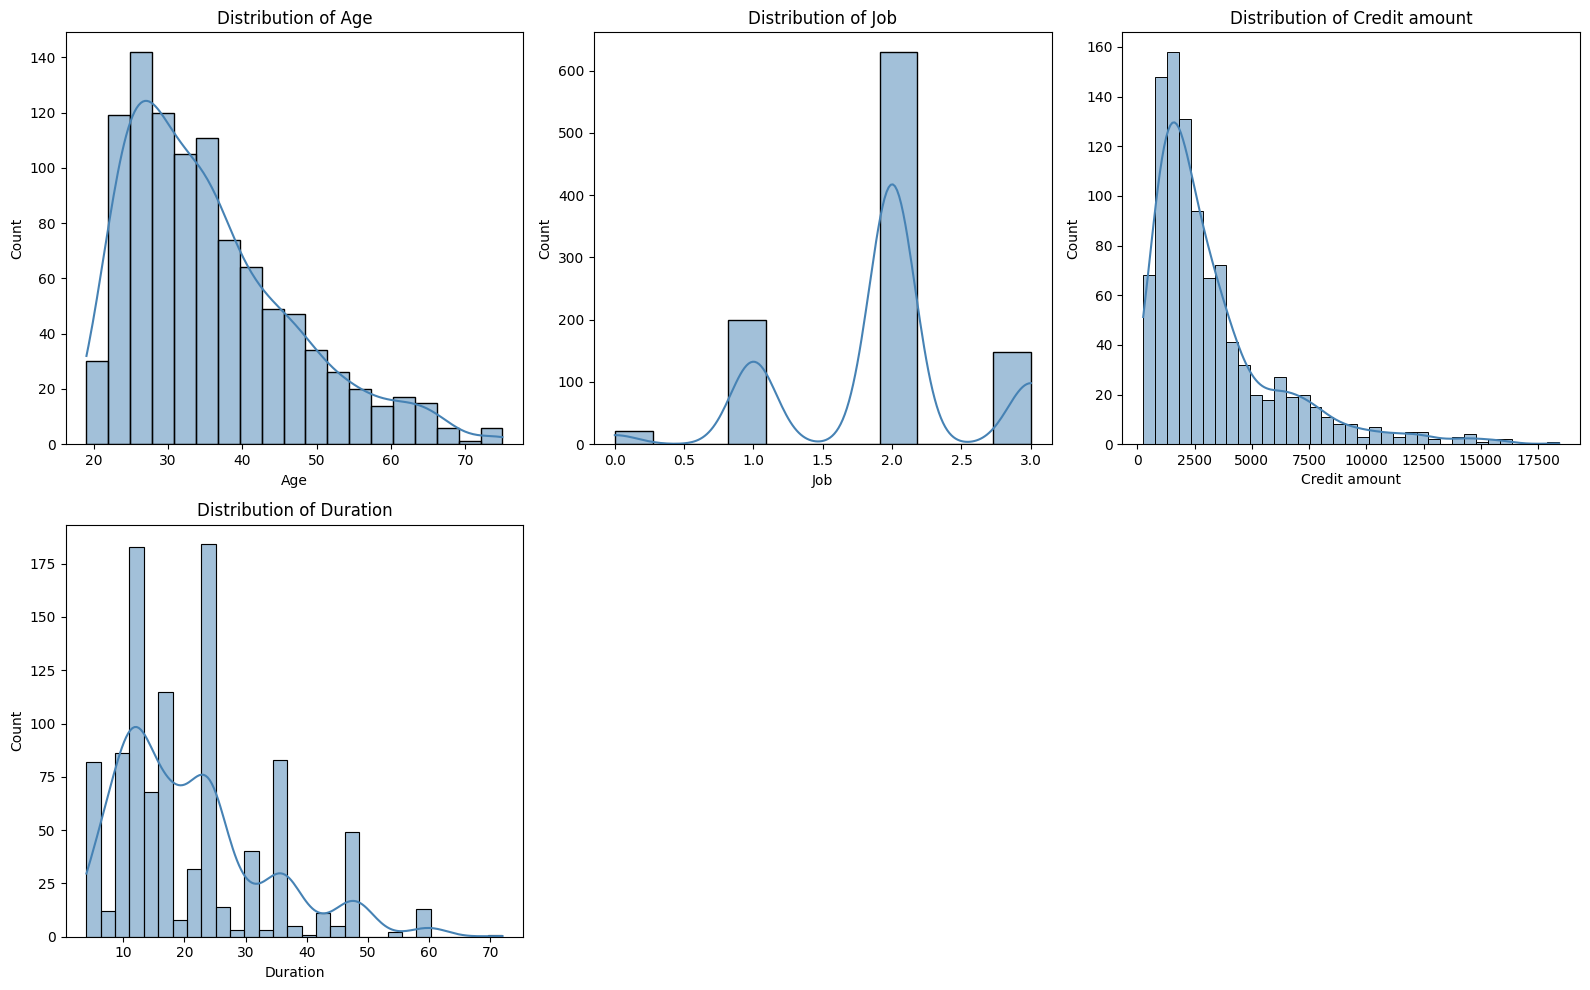

In [24]:

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

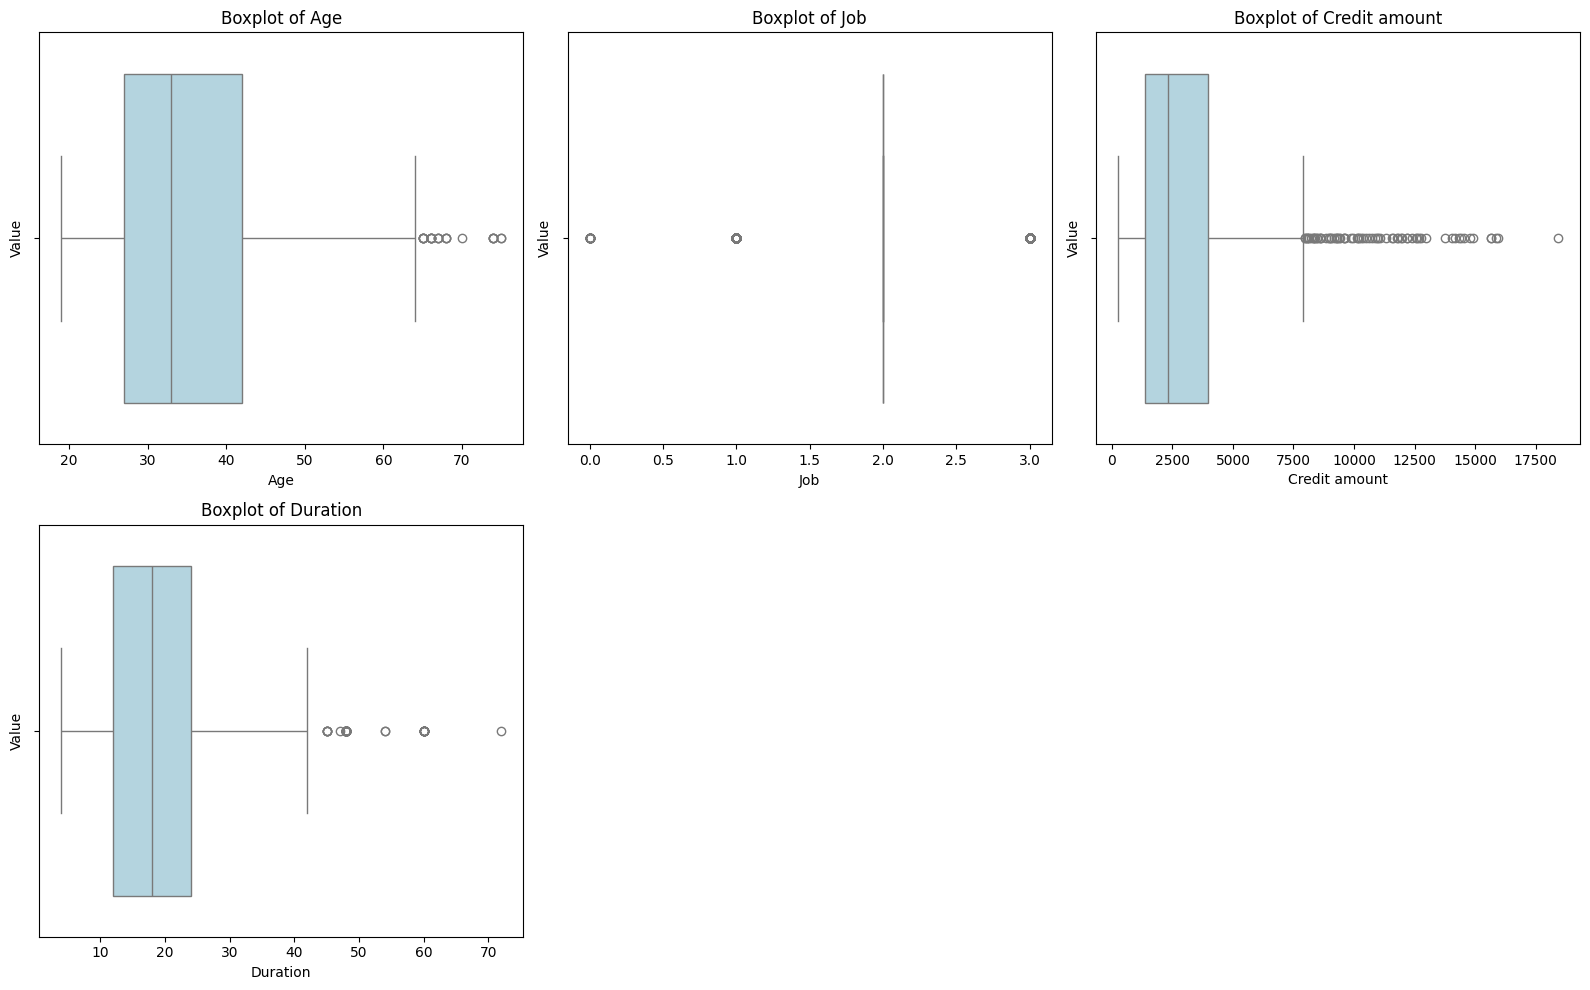

In [25]:

# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axes = axes.flatten()

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=data, x=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Remove empty axes if any
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

credit amount has some outliers

In [26]:
data[data['Credit amount'] > 10000]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
18,44,female,3,free,little,moderate,12579,24,car
63,25,male,2,own,little,moderate,14421,48,business
87,47,male,2,free,moderate,moderate,12612,36,education
95,58,male,2,rent,little,moderate,15945,54,business
105,39,male,3,own,little,moderate,11938,24,vacation/others
134,21,female,2,own,moderate,little,10144,60,radio/TV
205,38,male,3,free,little,little,10623,30,car
226,27,male,2,own,rich,moderate,10961,48,radio/TV
236,23,male,0,own,little,moderate,14555,6,car
272,36,male,3,free,little,moderate,12169,48,car


<Axes: xlabel='Purpose', ylabel='Credit amount'>

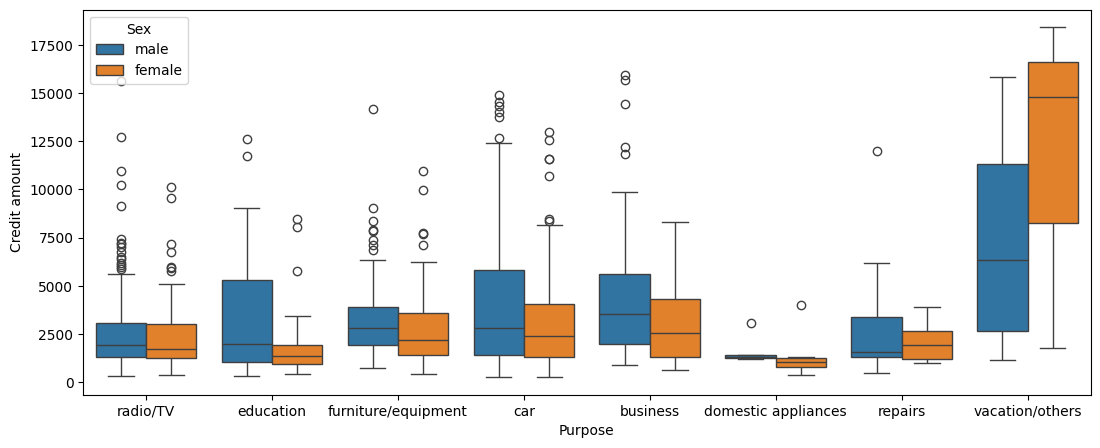

In [27]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='Purpose',y='Credit amount',hue='Sex')

vacations cosumes alot of credit amount

- vacations in female more than males
- cars is more in males

<Axes: xlabel='Job', ylabel='Credit amount'>

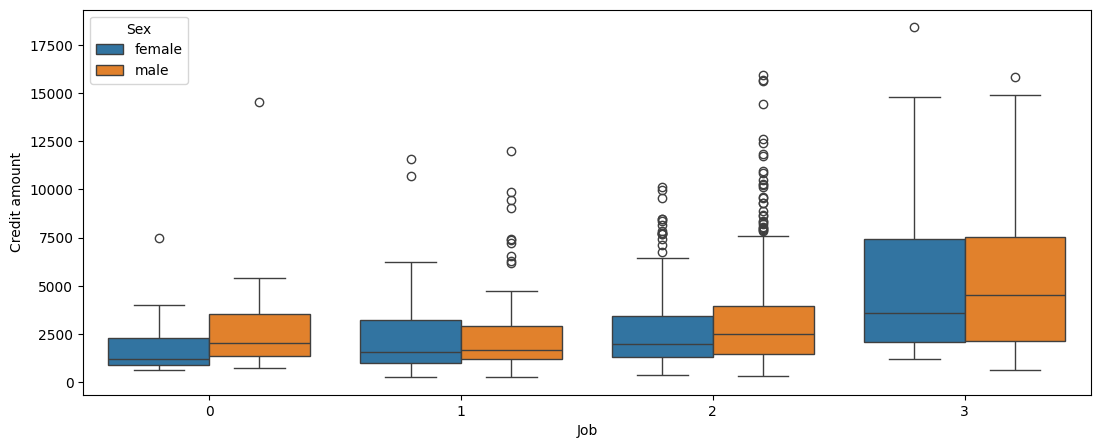

In [28]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='Job',y='Credit amount',hue='Sex')

<Axes: xlabel='Job', ylabel='Duration'>

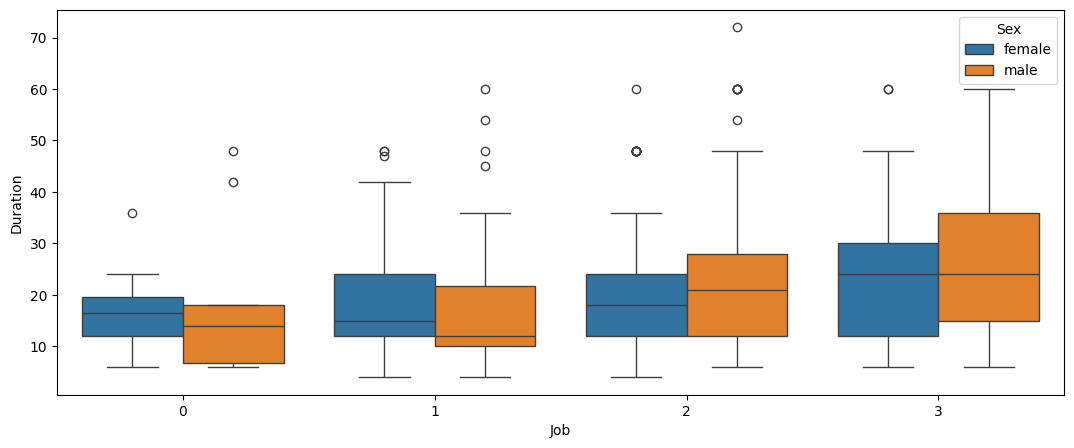

In [29]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='Job',y='Duration',hue='Sex')

## 2.Data Preprocessing

In [30]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


encoding :

In [31]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts())

Sex
male      690
female    310
Name: count, dtype: int64
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
little      610
moderate    327
rich         63
Name: count, dtype: int64
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


In [32]:
# one hot encoding :
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop=None, sparse_output=False)
ohe_enc = ohe.fit_transform(data[['Sex']])

ohe_df = pd.DataFrame(
    ohe_enc,
    columns=ohe.get_feature_names_out(),
    index=data.index
)

data = pd.concat([data.drop(columns=['Sex']), ohe_df.astype(int)], axis=1)
data.head()


,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_female,Sex_male
0,67,2,own,little,little,1169,6,radio/TV,0,1
1,22,2,own,little,moderate,5951,48,radio/TV,1,0
2,49,1,own,little,little,2096,12,education,0,1
3,45,2,free,little,little,7882,42,furniture/equipment,0,1
4,53,2,free,little,little,4870,24,car,0,1


ordinal encoding for 
1. Housing 
2. saving accounts 
3. checking accounts 
4. purpose

- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

cats  = [['free','rent','own']]

ord_enc = OrdinalEncoder(categories=cats)
data['Housing_encoding'] = ord_enc.fit_transform(data[['Housing']])
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_female,Sex_male,Housing_encoding
0,67,2,own,little,little,1169,6,radio/TV,0,1,2.0
1,22,2,own,little,moderate,5951,48,radio/TV,1,0,2.0
2,49,1,own,little,little,2096,12,education,0,1,2.0
3,45,2,free,little,little,7882,42,furniture/equipment,0,1,0.0
4,53,2,free,little,little,4870,24,car,0,1,0.0


In [34]:
cats = [['little','moderate','quite rich','rich']]
ord_enc = OrdinalEncoder(categories=cats)

data['saving_encoded'] = ord_enc.fit_transform(data[['Saving accounts']])
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_female,Sex_male,Housing_encoding,saving_encoded
0,67,2,own,little,little,1169,6,radio/TV,0,1,2.0,0.0
1,22,2,own,little,moderate,5951,48,radio/TV,1,0,2.0,0.0
2,49,1,own,little,little,2096,12,education,0,1,2.0,0.0
3,45,2,free,little,little,7882,42,furniture/equipment,0,1,0.0,0.0
4,53,2,free,little,little,4870,24,car,0,1,0.0,0.0


In [35]:
data['Checking account'].value_counts()

Checking account
little      610
moderate    327
rich         63
Name: count, dtype: int64

In [36]:
cats = [['little','moderate','rich']]
ord_enc = OrdinalEncoder(categories=cats)

data['checking_encoded'] = ord_enc.fit_transform(data[['Checking account']])
data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_female,Sex_male,Housing_encoding,saving_encoded,checking_encoded
0,67,2,own,little,little,1169,6,radio/TV,0,1,2.0,0.0,0.0
1,22,2,own,little,moderate,5951,48,radio/TV,1,0,2.0,0.0,1.0
2,49,1,own,little,little,2096,12,education,0,1,2.0,0.0,0.0
3,45,2,free,little,little,7882,42,furniture/equipment,0,1,0.0,0.0,0.0
4,53,2,free,little,little,4870,24,car,0,1,0.0,0.0,0.0


In [37]:
data.columns

Index(['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Sex_female', 'Sex_male',
       'Housing_encoding', 'saving_encoded', 'checking_encoded'],
      dtype='object')

In [38]:
numeric_cols = data.select_dtypes('number')
numeric_cols.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_encoding,saving_encoded,checking_encoded
0,67,2,1169,6,0,1,2.0,0.0,0.0
1,22,2,5951,48,1,0,2.0,0.0,1.0
2,49,1,2096,12,0,1,2.0,0.0,0.0
3,45,2,7882,42,0,1,0.0,0.0,0.0
4,53,2,4870,24,0,1,0.0,0.0,0.0


## 3.preparing data

1. applying log transformation on Credit amount

In [39]:
numeric_cols['Credit amount'] = np.log1p(numeric_cols['Credit amount'])
numeric_cols.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_encoding,saving_encoded,checking_encoded
0,67,2,7.064759,6,0,1,2.0,0.0,0.0
1,22,2,8.691483,48,1,0,2.0,0.0,1.0
2,49,1,7.648263,12,0,1,2.0,0.0,0.0
3,45,2,8.972464,42,0,1,0.0,0.0,0.0
4,53,2,8.491055,24,0,1,0.0,0.0,0.0


In [40]:
# scalling Age , Credit amount , Duration

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
numeric_cols[['Age','Credit amount','Duration']] = scaler.fit_transform(numeric_cols[['Age','Credit amount','Duration']])
#scaler.transform(numeric_cols[['Age','Credit amount','Duration']])

In [43]:
numeric_cols

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_encoding,saving_encoded,checking_encoded
0,0.857143,2,0.358311,0.029412,0,1,2.0,0.0,0.0
1,0.053571,2,0.736970,0.647059,1,0,2.0,0.0,1.0
2,0.535714,1,0.494135,0.117647,0,1,2.0,0.0,0.0
3,0.464286,2,0.802375,0.558824,0,1,0.0,0.0,0.0
4,0.607143,2,0.690315,0.294118,0,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,0.214286,1,0.450293,0.117647,1,0,2.0,0.0,0.0
996,0.375000,3,0.636044,0.382353,0,1,2.0,0.0,0.0
997,0.339286,2,0.271272,0.117647,0,1,2.0,0.0,0.0
998,0.071429,2,0.464460,0.602941,0,1,0.0,0.0,0.0


## 4.Modeling

choosing best k

1. Elbow Method :

In [44]:
sum_sq_distances = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i).fit(numeric_cols)
    sum_sq_distances.append(Kmeans.inertia_)

In [45]:
sum_sq_distances

[2436.461126173983,
 2165.625273193696,
 1521.9833214118516,
 1309.9952846937072,
 1279.0218467834816,
 1096.5345118471885,
 866.0847882532232,
 823.1814929062641,
 841.523004600728,
 755.3859740624483]

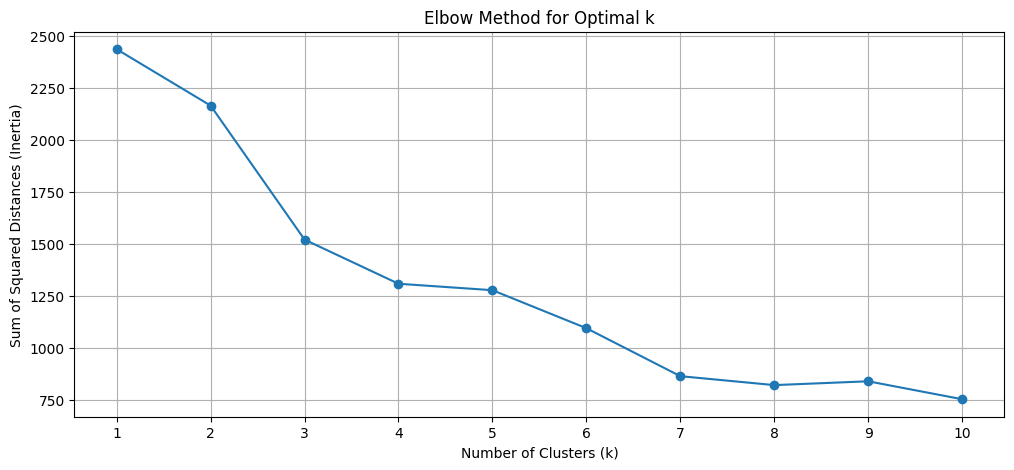

In [46]:
plt.figure(figsize=(12,5))
plt.plot([1,2,3,4,5,6,7,8,9,10], sum_sq_distances, marker='o')

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

K = 5 may be best choise 

In [47]:
Kmeans_model = KMeans(n_clusters=5).fit(numeric_cols)
labels = pd.DataFrame(Kmeans_model.labels_)

In [48]:
import joblib

In [49]:
joblib.dump(Kmeans_model, 'kmeans_model.pkl')

print("✅ KMeans model saved successfully!")

✅ KMeans model saved successfully!


In [50]:
labels

,0
0,2
1,4
2,2
3,3
4,3
...,...
995,4
996,1
997,2
998,3


concat data with labels

In [51]:
clustered_data  = pd.concat([numeric_cols,labels],axis=1)
clustered_data.rename(columns={0:'cluster'}, inplace=True)
clustered_data.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_encoding,saving_encoded,checking_encoded,cluster
0,0.857143,2,0.358311,0.029412,0,1,2.0,0.0,0.0,2
1,0.053571,2,0.736970,0.647059,1,0,2.0,0.0,1.0,4
2,0.535714,1,0.494135,0.117647,0,1,2.0,0.0,0.0,2
3,0.464286,2,0.802375,0.558824,0,1,0.0,0.0,0.0,3
4,0.607143,2,0.690315,0.294118,0,1,0.0,0.0,0.0,3


In [52]:
clustered_data.groupby('cluster').mean()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_encoding,saving_encoded,checking_encoded
cluster,,,,,,,,,
0,0.321750,1.828829,0.479244,0.216481,0.315315,0.684685,1.666667,2.432432,0.414414
1,0.270461,2.385417,0.576340,0.271676,0.020833,0.979167,1.864583,0.177083,1.119792
2,0.316203,1.588424,0.500938,0.231511,0.000000,1.000000,1.942122,0.093248,0.122186
3,0.397998,2.189394,0.625061,0.325535,0.128788,0.871212,0.250000,0.098485,0.363636
4,0.224199,1.811024,0.491334,0.226031,1.000000,0.000000,1.673228,0.106299,0.417323


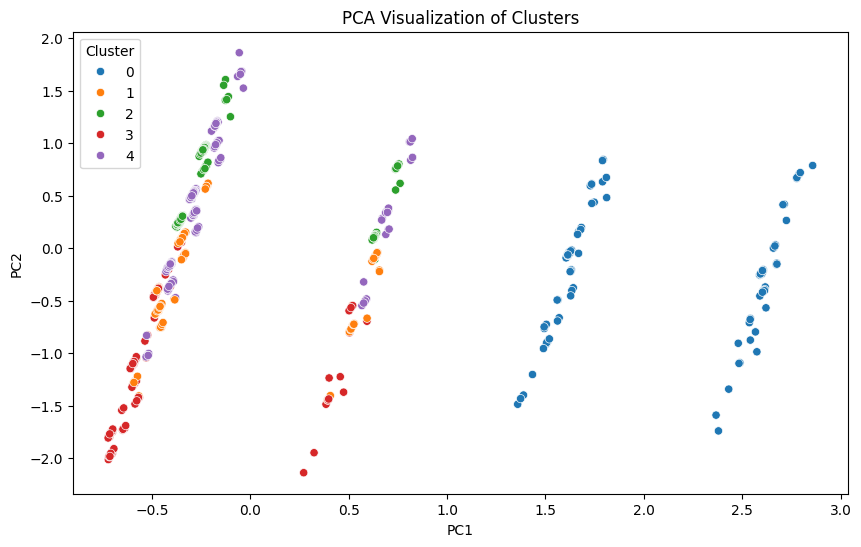

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_cols)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels.values

plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('PCA Visualization of Clusters')
plt.show()